In [58]:
import pandas as pd
import numpy as np
import csv
import os
import glob
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [59]:
#crime_file = "crime_summary_by_neighborhood_offense_year.csv"
crime_file = "my_crime_data.csv"
#cluster_file = "clusters_names.csv"

In [60]:
crime_df = pd.read_csv(crime_file, encoding="ISO-8859-1")

In [61]:
crime_df.head()

,Unnamed: 0,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,0,cluster 15,600.0,property,-77.069766,2015-05-05T17:45:00.000,theft f/auto,evening,140519.000000,2.0,...,393951.000000,3500 - 3599 block of lowell street nw,2015-05-05T15:00:00.000,15064669,theft f/auto,3C,2015-05-05T22:06:00.000Z,others,"38.932540365033717,-77.069768169731375",38.932533
1,1,cluster 2,3000.0,violent,-77.031208,2015-05-05T20:55:00.000,robbery,evening,140084.000000,3.0,...,397294.000000,1300 - 1399 block of irving street nw,2015-05-05T20:50:00.000,15064781,robbery,1A,2015-05-06T01:05:00.000Z,gun,"38.928638407177509,-77.031210110921407",38.928631
2,2,cluster 3,4400.0,property,-77.028460,2015-05-05T22:14:00.000,motor vehicle theft,evening,139201.000000,3.0,...,397532.000000,1200 - 1247 block of florida avenue nw,2015-05-05T18:18:00.000,15064796,motor vehicle theft,1B,2015-05-06T02:58:00.000Z,others,"38.920684762113531,-77.028462123394547",38.920677
3,3,cluster 23,8804.0,violent,-76.985496,2015-06-23T08:00:00.000,homicide,midnight,137689.000000,5.0,...,401258.000000,1200 - 1299 block of holbrook terrace ne,2015-06-23T05:23:00.000,15094190,homicide,5D,2015-06-24T04:00:00.000Z,gun,"38.907066722563066,-76.985498377563218",38.907059
4,4,cluster 25,8100.0,property,-76.990245,2015-06-23T06:30:00.000,theft f/auto,day,136398.650012,1.0,...,400846.210015,duncan place ne and 12th street ne,2015-06-22T22:00:00.000,15094194,theft f/auto,6A,2015-06-23T12:48:00.000Z,others,"38.895443280295112,-76.990247632314322",38.895435


In [62]:
neighborhood_df=crime_df.rename(index=str , columns={"NEIGHBORHOOD_CLUSTER":"NEIGHBORHOOD"})
neighborhood_df.head()

,Unnamed: 0,NEIGHBORHOOD,CENSUS_TRACT,offensegroup,LONGITUDE,END_DATE,offense-text,SHIFT,YBLOCK,DISTRICT,...,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,REPORT_DAT,METHOD,location,LATITUDE
0,0,cluster 15,600.0,property,-77.069766,2015-05-05T17:45:00.000,theft f/auto,evening,140519.000000,2.0,...,393951.000000,3500 - 3599 block of lowell street nw,2015-05-05T15:00:00.000,15064669,theft f/auto,3C,2015-05-05T22:06:00.000Z,others,"38.932540365033717,-77.069768169731375",38.932533
1,1,cluster 2,3000.0,violent,-77.031208,2015-05-05T20:55:00.000,robbery,evening,140084.000000,3.0,...,397294.000000,1300 - 1399 block of irving street nw,2015-05-05T20:50:00.000,15064781,robbery,1A,2015-05-06T01:05:00.000Z,gun,"38.928638407177509,-77.031210110921407",38.928631
2,2,cluster 3,4400.0,property,-77.028460,2015-05-05T22:14:00.000,motor vehicle theft,evening,139201.000000,3.0,...,397532.000000,1200 - 1247 block of florida avenue nw,2015-05-05T18:18:00.000,15064796,motor vehicle theft,1B,2015-05-06T02:58:00.000Z,others,"38.920684762113531,-77.028462123394547",38.920677
3,3,cluster 23,8804.0,violent,-76.985496,2015-06-23T08:00:00.000,homicide,midnight,137689.000000,5.0,...,401258.000000,1200 - 1299 block of holbrook terrace ne,2015-06-23T05:23:00.000,15094190,homicide,5D,2015-06-24T04:00:00.000Z,gun,"38.907066722563066,-76.985498377563218",38.907059
4,4,cluster 25,8100.0,property,-76.990245,2015-06-23T06:30:00.000,theft f/auto,day,136398.650012,1.0,...,400846.210015,duncan place ne and 12th street ne,2015-06-22T22:00:00.000,15094194,theft f/auto,6A,2015-06-23T12:48:00.000Z,others,"38.895443280295112,-76.990247632314322",38.895435


In [63]:

#neighborhood_df['NEIGHBORHOOD']= neighborhood_df['NEIGHBORHOOD'].replace(
name_list = ['Kalorama Heights, Adams Morgan, Lanier Heights',
             'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View',
             'Howard University, Le Droit Park, Cardozo/Shaw',
             'Georgetown, Burleith/Hillandale',
             'West End, Foggy Bottom, GWU',
             'Dupont Circle, Connecticut Avenue/K Street',
             'Shaw, Logan Circle',
             'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street',
             'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point',
             'Hawthorne, Barnaby Woods, Chevy Chase',
             'Friendship Heights, American University Park, Tenleytown',
             'North Cleveland Park, Forest Hills, Van Ness',
             'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir',
             'Cathedral Heights, McLean Gardens, Glover Park',
             'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace',
             'Colonial Village, Shepherd Park, North Portal Estates',
             'Takoma, Brightwood, Manor Park',
             'Brightwood Park, Crestwood, Petworth',
             'Lamond Riggs, Queens Chapel, Fort Totten, Pleasant Hill',
             'North Michigan Park, Michigan Park, University Heights',
             'Edgewood, Bloomingdale, Truxton Circle, Eckington',
             'Brookland, Brentwood, Langdon',
             'Ivy City, Arboretum, Trinidad, Carver Langston',
             'Woodridge, Fort Lincoln, Gateway',
             'NoMa, Union Station, Stanton Park, Kingman Park',
             'Capitol Hill, Lincoln Park',
             'Near Southeast, Navy Yard',
             'Historic Anacostia',
             'Eastland Gardens, Kenilworth',
             'Mayfair, Hillbrook, Mahaning Heights',
             'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights',
             'River Terrace, Benning, Greenway, Fort Dupont',
             'Capitol View, Marshall Heights, Benning Heights',
             'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park',
             'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park',
             'Woodland/Fort Stanton, Garfield Heights, Knox Hill',
             'Sheridan, Barry Farm, Buena Vista',
             'Douglass, Shipley Terrace',
             'Congress Heights, Bellevue, Washington Highlands']

neighborhood_names = pd.DataFrame(name_list, columns=['CLUSTER_NAMES'])
neighborhood_names

,CLUSTER_NAMES
0,"Kalorama Heights, Adams Morgan, Lanier Heights"
1,"Columbia Heights, Mt. Pleasant, Pleasant Plain..."
2,"Howard University, Le Droit Park, Cardozo/Shaw"
3,"Georgetown, Burleith/Hillandale"
4,"West End, Foggy Bottom, GWU"
5,"Dupont Circle, Connecticut Avenue/K Street"
6,"Shaw, Logan Circle"
7,"Downtown, Chinatown, Penn Quarters, Mount Vern..."
8,"Southwest Employment Area, Southwest/Waterfron..."
9,"Hawthorne, Barnaby Woods, Chevy Chase"


In [64]:
neighborhood_df = neighborhood_df[["NEIGHBORHOOD", "YEAR","OFFENSE"]]
neighborhood_df = neighborhood_df[neighborhood_df["YEAR"] > 2010]
neighborhood_df = neighborhood_df[neighborhood_df["YEAR"] < 2019]
#df[((df.Name != 'jhon') &( df.Age != 15) & (df.Grade != 'A'))]
#neighborhood_df = neighborhood_df[(neighborhood_df.YEAR != "2011", "2012", "2013", "2014", "2015", "2016", "2017","2018")]
#print(neighborhood_df["YEAR"].unique())
neighborhood_df.head()

,NEIGHBORHOOD,YEAR,OFFENSE
0,cluster 15,2015.0,theft f/auto
1,cluster 2,2015.0,robbery
2,cluster 3,2015.0,motor vehicle theft
3,cluster 23,2015.0,homicide
4,cluster 25,2015.0,theft f/auto


In [65]:
#neighborhood_df["YEAR"] = neighborhood_df["YEAR"].str[:4]
#neighborhood_df["YEAR"] = pd.to_numeric(neighborhood_df["YEAR"], errors='coerce')
#neighborhood_df.head()

In [66]:
neighborhood_list = neighborhood_df["NEIGHBORHOOD"].unique()
neighborhood_list

array(['cluster 15', 'cluster 2', 'cluster 3', 'cluster 23', 'cluster 25',
       'cluster 37', 'cluster 21', 'cluster 7', 'cluster 9', 'cluster 12',
       'cluster 26', 'cluster 31', 'cluster 39', 'cluster 30', 'cluster 8',
       'cluster 18', 'cluster 5', 'cluster 1', 'cluster 20', 'cluster 4',
       nan, 'cluster 34', 'cluster 22', 'cluster 17', 'cluster 6',
       'cluster 32', 'cluster 24', 'cluster 13', 'cluster 33',
       'cluster 19', 'cluster 38', 'cluster 10', 'cluster 28',
       'cluster 35', 'cluster 11', 'cluster 14', 'cluster 36',
       'cluster 27', 'cluster 29', 'cluster 16'], dtype=object)

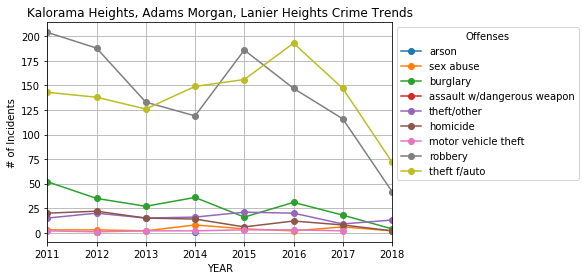

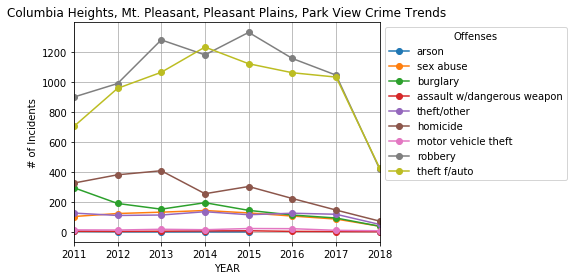

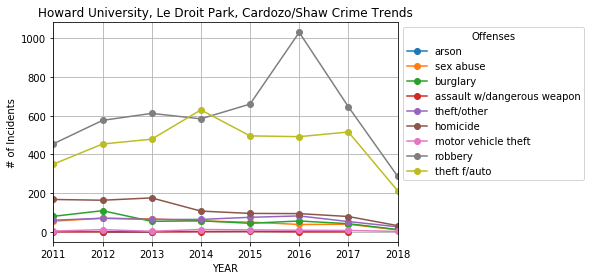

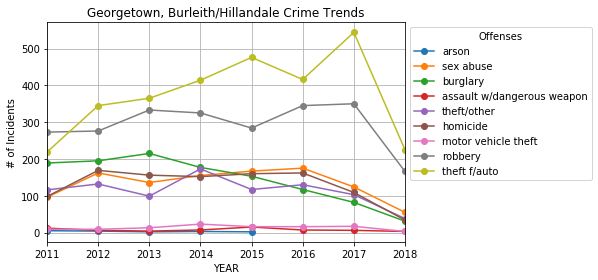

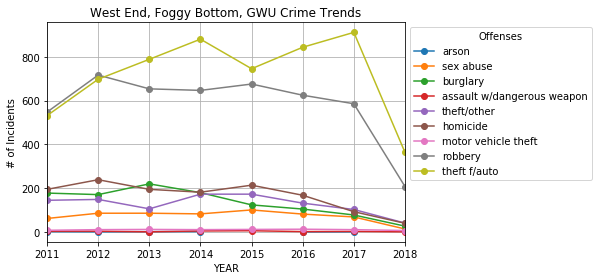

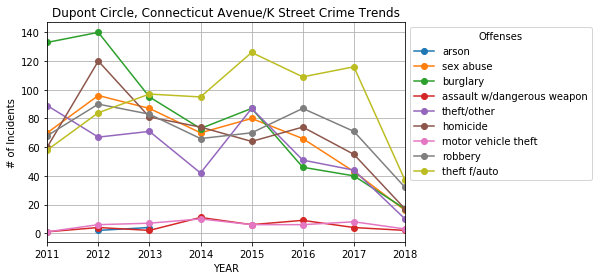

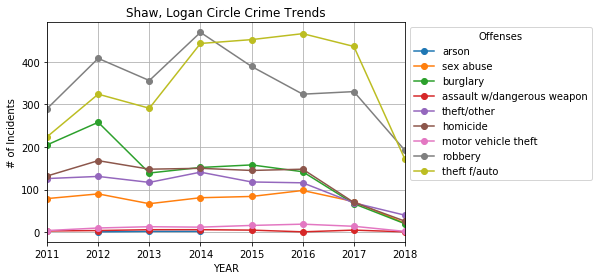

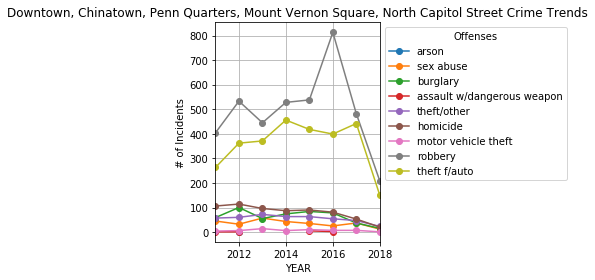

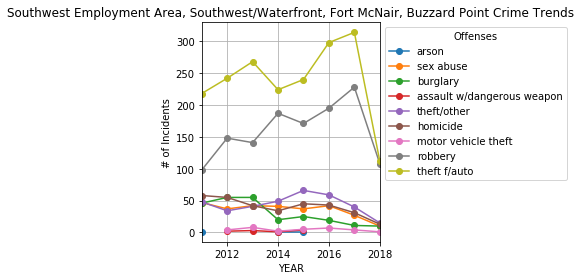

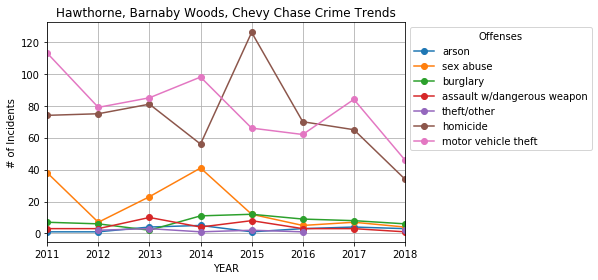

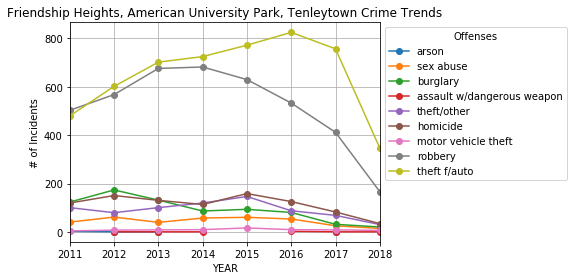

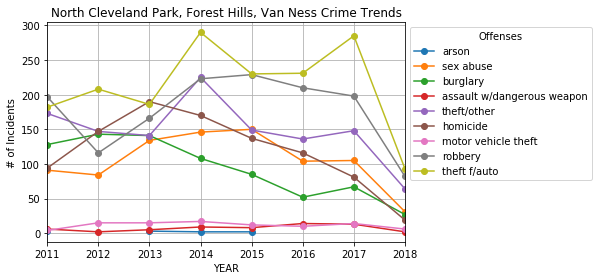

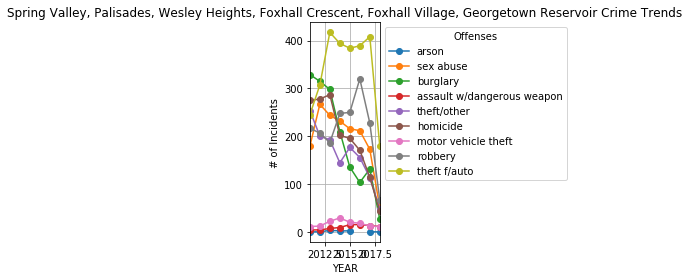

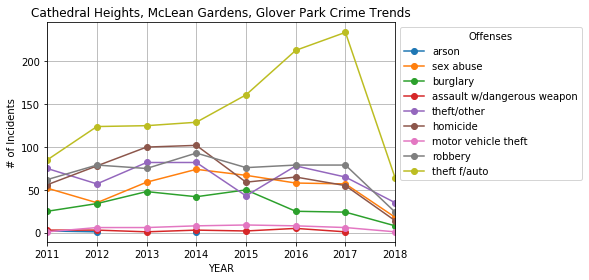

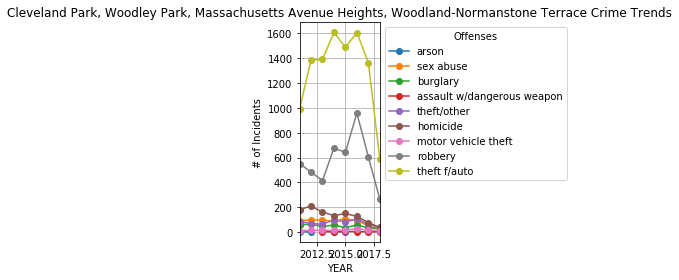

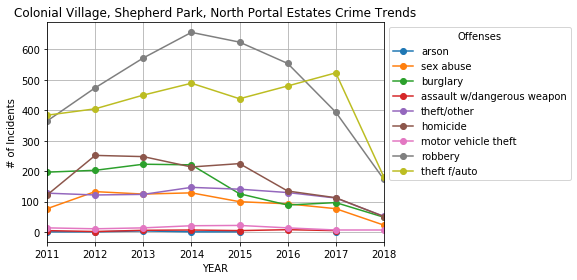

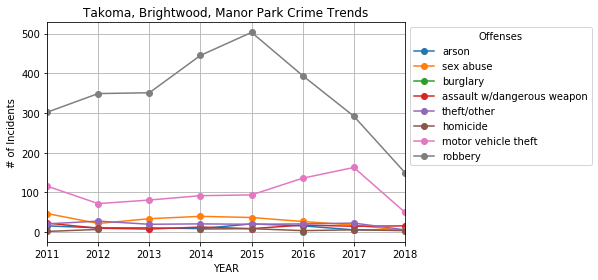

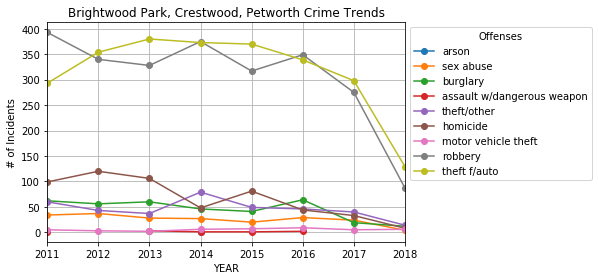

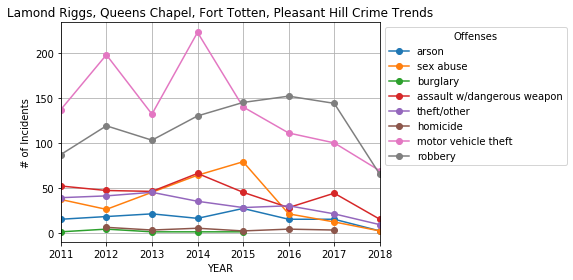

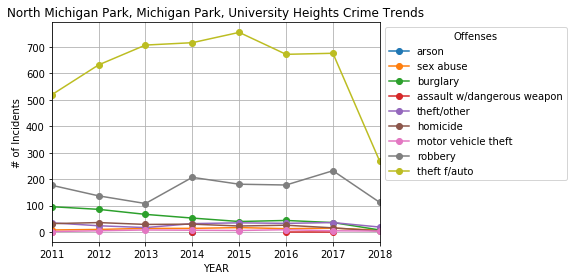

TypeError: Empty 'DataFrame': no numeric data to plot

In [71]:
#root = "Clusters"
#for n in neighborhood_list:
for n, c in zip(neighborhood_list, name_list):
    neighborhood_groups_df = neighborhood_df.loc[neighborhood_df["NEIGHBORHOOD"] == n,["YEAR","OFFENSE"]]
    neighborhood_groups_df = neighborhood_groups_df.groupby(["YEAR", "OFFENSE"]).size().reset_index(name="INCIDENT_COUNT")
    neighborhood_groups_df = neighborhood_groups_df.pivot(index = "YEAR", columns = "OFFENSE", values = "INCIDENT_COUNT")
    #neighborhood_groups_df = neighborhood_groups_df.reset_index()
    #neighborhood_groups_df = neighborhood_groups_df[neighborhood_groups_df["YEAR"] > 2010]
    #neighborhood_groups_df = neighborhood_groups_df[neighborhood_groups_df["YEAR"] < 2019]
    #neighborhood_groups_df["YEAR"] = pd.to_numeric(neighborhood_groups_df["YEAR"], errors='coerce')
    
    #neighborhood_groups_json = neighborhood_groups_df.to_json("offense_count.json", orient = "split")
    #Line writes data to individual csv files
    #file_name = str(n) + ".csv"
    #neighborhood_groups_df.to_csv(file_name, index=None, encoding='utf-8')
    
    neighborhood_groups_df.plot(kind="line", marker="o", grid = True).legend(np.flip(neighborhood_df["OFFENSE"]
            .unique(), 0), bbox_to_anchor=(1, 1), title = "Offenses")


    # Set the label for the y-axis
    plt.ylabel("# of Incidents")
    #plt.title(str(n) + " Crime Trends")
    #for c in name_list:
    plt.title(str(c) + " Crime Trends")

    plt.xlim(2011,2018)

    #Tight fit layout
    plt.tight_layout()

    # Save Figure
    plt.savefig(str(n) + ".png", bbox_inches = "tight")

    # Show plot
    plt.show()

In [72]:
neighborhood_groups_df.plot(kind="line", marker="o", grid = True).legend(neighborhood_df["OFFENSE"].unique(), bbox_to_anchor=(1, 1), title = "Offenses")

#plt.legend(name_df["Clusters"], markerscale=1, bbox_to_anchor=(1.0, 1.0))
# Set the label for the y-axis
plt.ylabel("# of Incidents")
plt.title("Cluster Crime Trends")

plt.xlim(2011,2018)

#Tight fit layout
#plt.tight_layout()

# Save Figure
plt.savefig("Test.jpg")

# Show plot
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [26]:
df = pd.read_json("offense_count.json", orient='columns')
pprint(df)

ValueError: arrays must all be same length